## Car price prediction: Data Analysis

There will be a notebook for each one of the Machine Learning Pipeline steps:

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building

**This is the notebook for step 1: Data Analysis**

===================================================================================================


## Predicting car price

The aim of the project is to build a machine learning model to predict the price of a used car based up on the given data.

### Why is this important?

Purchasing a car is a desire shared by many families around the world. As a result, consumers will exercise extreme caution while selecting a vehicle, particularly if it is a used vehicle. One of the most difficult obstacles they face is determining the pricing. So, if we can assist clients in overcoming this key stumbling block, we will be able to improve their experience and acquire their trust. Also, if we can aid the seller in selling his car for a decent price, they will remain loyal to us.

- If we predict low price for a good car, the seller may be dissatisfied 
- If we predict high price for a bad car, the client who purchased it may be dissatisfied.


**We will analyse the dataset to identify:**

1. Missing values
2. Numerical variables
3. Distribution of the numerical variables
4. Outliers
5. Categorical variables
6. Cardinality of the categorical variables

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
sns.set(rc={'figure.figsize':(25.7,8.27)})


# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', 100)
pd.pandas.set_option('display.max_rows', 100)
#pd.set_option("precision", 2)

import warnings
warnings.filterwarnings('ignore')

%config Completer.use_jedi = False

In [3]:
# load dataset
data = pd.read_json('../data/training_data.json')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(100, 8)


,AppID,Ins_Age,Ins_Gender,Ht,Wt,bmi,quote,reason
0,56372,31,Male,510,185,26.5,500,BMI is in right range
1,34565,35,Male,510,205,29.4,500,BMI is in right range
2,57732,45,Female,510,125,17.9,900,Age is between 40 to 59 and 'BMI' is either le...
3,87324,38,Male,503,175,31.0,500,BMI is in right range
4,12323,39,Female,600,252,34.1,450,BMI is in right range


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AppID       100 non-null    int64  
 1   Ins_Age     100 non-null    int64  
 2   Ins_Gender  100 non-null    object 
 3   Ht          100 non-null    int64  
 4   Wt          100 non-null    int64  
 5   bmi         100 non-null    float64
 6   quote       100 non-null    int64  
 7   reason      100 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 7.0+ KB


In [4]:
# changing the datatypes of fields.
data['lot'] = data['lot'].astype('str')

### Missing values

Let's go ahead and find out which variables of the dataset contain missing values

In [5]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum()>1]

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(data[var].isnull().mean(), 3),  ' % missing values')

There are no missing rows in the Dataset

### Numerical variables

Let's go ahead and find out what numerical variables we have in the dataset

In [6]:
# list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes in ["int64","float64"]]
del num_vars[1]

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  5


,AppID,Ht,Wt,bmi,quote
0,56372,510,185,26.5,500
1,34565,510,205,29.4,500
2,57732,510,125,17.9,900
3,87324,503,175,31.0,500
4,12323,600,252,34.1,450


### Discrete variables

Let's go ahead and find which variables are discrete, i.e., show a finite number of values

In [7]:
#  list of discrete variables
discrete_vars = [var for var in num_vars if len(data[var].unique())<20]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  2


### Continuous variables

Let's go ahead and find the distribution of the continuous variables. We will consider continuous as all those numerical variables that are not discrete variables in our dataset.

In [8]:
# list of continuous variables
cont_vars = [var for var in num_vars if len(data[var].unique())>20]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  3


In [9]:
# let's visualise the continuous variables
data[cont_vars].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,AppID,Wt,bmi
count,100.00,100.00,100.00
mean,79455.57,165.15,25.05
std,31123.73,27.66,4.92
min,12123.00,110.00,15.40
25%,64296.00,145.00,22.05
50%,99444.50,170.00,25.10
75%,99917.00,180.00,28.23
max,100345.00,275.00,39.40


I assumed price in \\$ and mileage in miles

From the above stats we can understand that the 
- Median car price  is 16900\\$ and mean is 18767\\$.  As mean is greater than median this distribution is right skewed.
- Median mileage is 35365 miles and mean is 52298 miles. As mean is greater than median this distribution is right skewed.

There are few cars in the dataset with a mileage of 0 miles and a price of 0$. And some of them have a mileage of more than 500,000 miles, which are usually considered as outliers. Later in my notebook, I dealt with them.



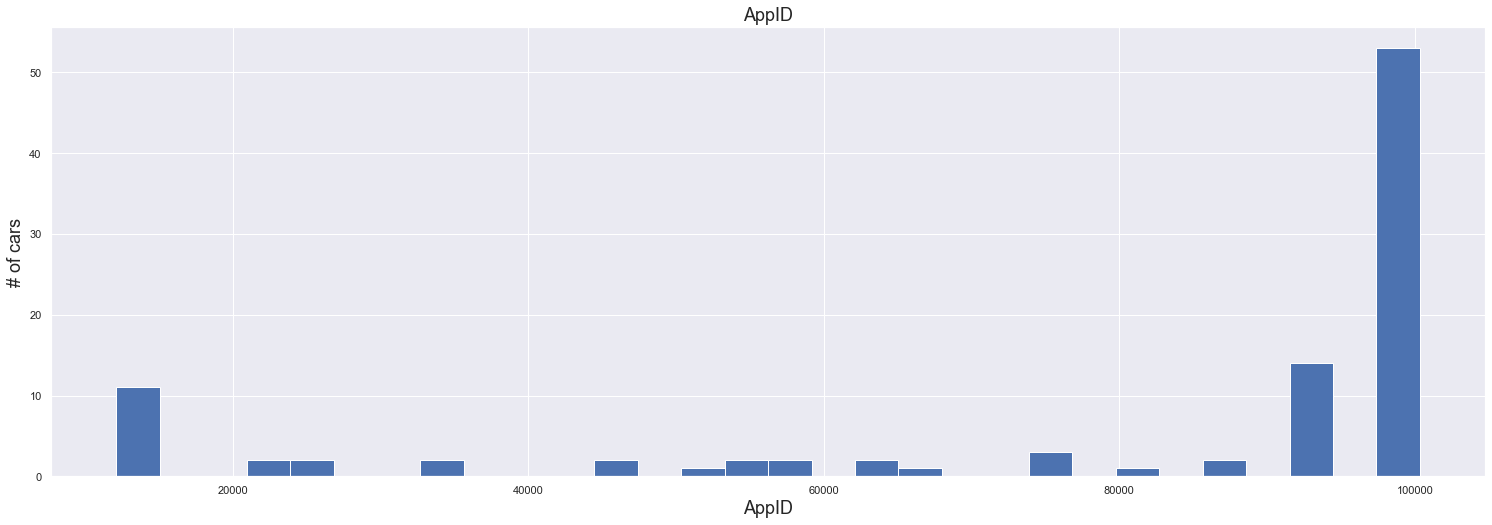

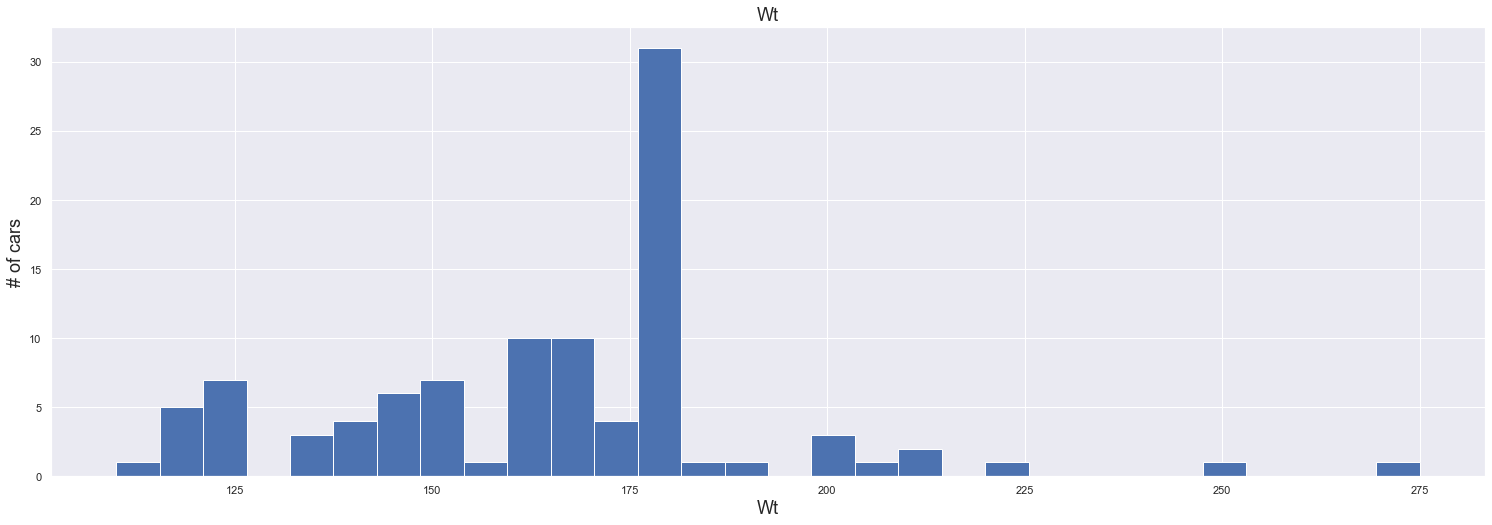

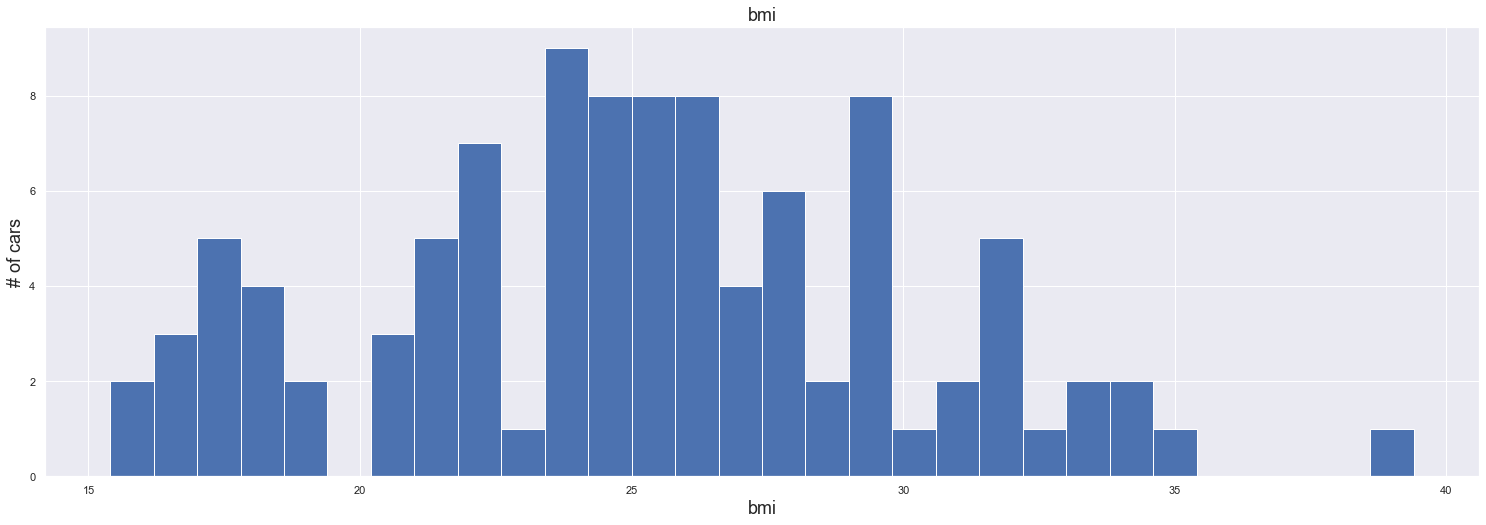

In [10]:
# Let's go ahead and analyse the distributions of these variables
def analyse_continous(df, var):
    df = df.copy()
    plt.hist(df[var], bins=30)
    plt.ylabel('# of cars',fontsize=18)
    plt.xlabel(var,fontsize=18)
    plt.title(var,fontsize=18)
    plt.show()
    
for var in cont_vars:
    analyse_continous(data, var)

As we thought before, price and mileage variables are skewed to the right and they are not normally distributed. We can apply power transformation like log transformation to these variables to convert the distributions to normal.

### Removing the outliers from the continous variables

As we have seen above there are few outliers on the dataset and I have removed them here. For the sake of simplicity I just removed the values which are less than 3 percentile and more than 97 percentile.

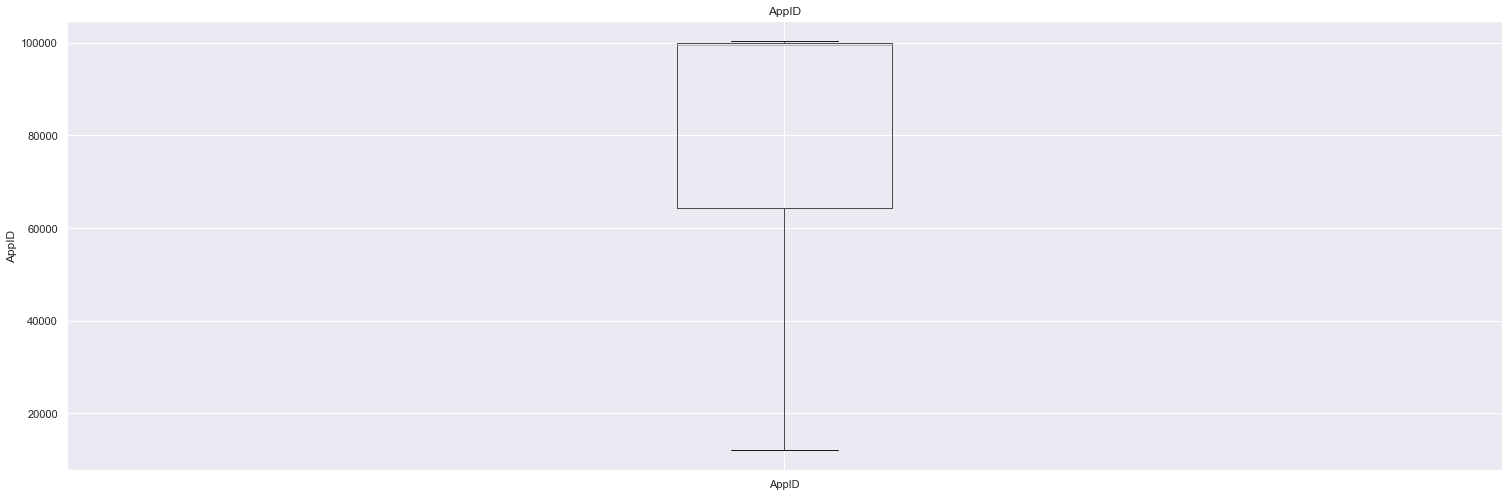

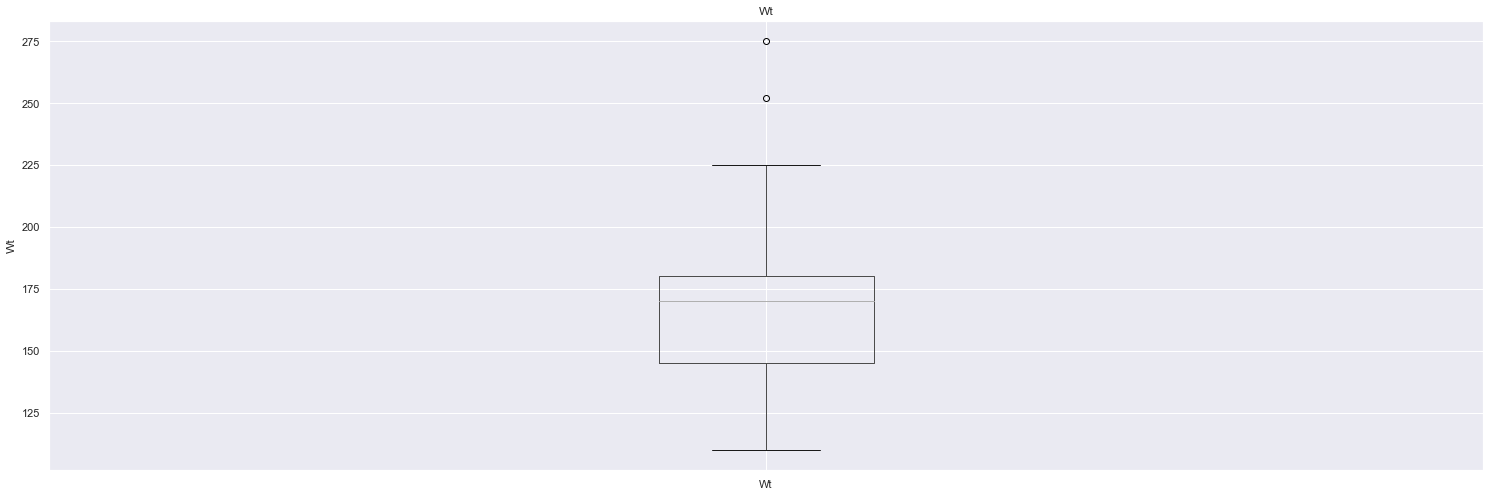

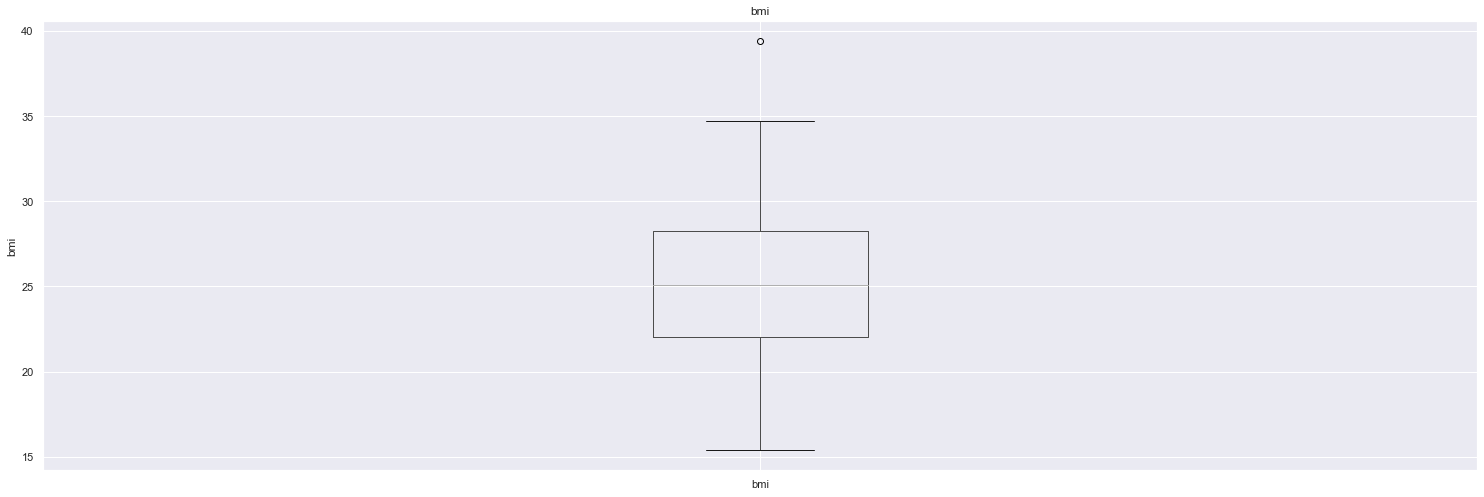

In [11]:
# let's make boxplots to visualise outliers in the continuous variables 

def find_outliers(df, var):
    df = df.copy()
    df.boxplot(column=var)
    plt.title(var)
    plt.ylabel(var)
    plt.show()
    
for var in cont_vars:
    find_outliers(data, var)

## Applying log transformation

We can apply a log transformation to variables like Price and mileage to get a more normal like distribution. 

After applying the log transformations, we can see that the variable distribution resembles like a normal distribution.

### Temporal variables

The preceding graphs show that the median price is high for the years 2015 through 2021, as well as for a few cars before 1980. This is to be expected, given the great demand for the most recent vehicles. The high price of the car before 1980 is attributed to a model of Chevrolet Camaro that might be classified as a vintage car.

### Categorical variables

Let's analyse the categorical variables present in the dataset.

In [13]:
# dropping key columns form the dataset
data.drop(['AppID','reason'],inplace=True,axis=1)

In [14]:
data.head()

,Ins_Age,Ins_Gender,Ht,Wt,bmi,quote
0,31,Male,510,185,26.5,500
1,35,Male,510,205,29.4,500
2,45,Female,510,125,17.9,900
3,38,Male,503,175,31.0,500
4,39,Female,600,252,34.1,450


In [15]:
cat_vars = [var for var in data.columns if data[var].dtypes in ['object']]

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  1


In [16]:
# let's visualise the values of the categorical variables
data[cat_vars].head()

,Ins_Gender
0,Male
1,Male
2,Female
3,Male
4,Female


We can deduce the following from the charts above:
- BMW and Audi have higher median prices than the other brands.
- As expected, the median price of a clean vehicle is higher than the median price of a damaged vehicle (salvage insurance). 
- The median price of a vehicle in Kentucky is greater than the other states, and the price range is narrow.

### Rare Labels

Let's investigate now if there are labels that are present only in a small number:

In [18]:
for var in cat_vars:
    print(var,"has", len(data[var].unique()), ' categories')

Ins_Gender has 2  categories


Cardinality of features like model, color and state is very high. Lets find out if there are any rare labels in the dataset and replace them with a new category called "rare"

In [19]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df.groupby(var)[var].count() / len(df)
    return tmp[tmp<rare_perc]*100

for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.005))
    print()


Series([], Name: Ins_Gender, dtype: float64)



From the above data we can infer that in the variables "brand","Model", "state" and "country" there are few categories which are present in less than 0.5% of the rows. In the next notebook I have replaced them with a new category called "rare".

## Possible Data leakage

The auction time (condition) is usually displayed after the car is advertised on the website. So, I assumed that this can lead to data leakage and I didn’t incorporated this characteristic in the model's training. This assumption might be wrong.


In [21]:
# saving the data
data.to_csv('../data/output/step1data.csv', index=False)